# KPI Processing and Graph plotting
### This Jupyter Notebook will walk through the method of dataprocessing for the contractor KPI's 

## Importing required Libraries 
- The first step to any python coding is to import the libraries you will require. Libraries are essentially add ons which allow you to call upon functions which are not built into python itself.
- We do this by typing <font color ='green'> **import** </font> the name of the library and then <font color='green'> **as** </font> and what we want to refer to the library as in the code.
    - you can import libraries <font color='green'> **as** </font> anything you want but its best to use the 'generally accepted' shortenings as if you ever look any codes up online you will find these. 
    
### Description of the libraries used here
- Matplotlib.pyplot (plt), this is the primary library for plotting graphs and charts. It can plot all sorts of graphs from line to bar to pie. Very straightforward to use. 
- Pandas (pd) , this is the library used for reading and writing excel files. pd.dataframe function will turn a table from excel into a pandas dataframe which is compatible for use with python processing.
- Numpy (np), an essential library for mathematical functions. Functions such as np.linspace takes a range and produces a list of numbers at specified intervals inbetween them. 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import openpyxl as px 
import matplotlib.colors as colors 

## Choosing the filename

In the cell below, input the name of the excel file which stores the KPI data from the contractors in the format seen below. Make sure there are speech marks around the filename and it is a .xlsx file

<font color = 'red'> **This part may have to be changed if all the contractors wont input their datd into the same excel workbook. In that case we will make the next function take filename as one of the arguments.**</font> 


In [3]:
filename = 'Sample_KPI_Processing.xlsx'

## Calculating weighted KPI score for each contractor. 

T2 overall KPI Performance for Jan23 is 100.0%
UKCS overall KPI Performance for Jan23 is 100.0%


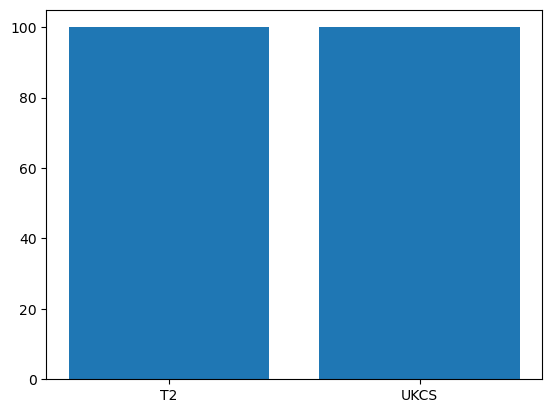

In [4]:
def calc_KPI(sheet, name, ):
    KPI1 = pd.read_excel(filename, sheet, index_col=None, usecols = "D",  header = 2, nrows=0)
    KPI2= pd.read_excel(filename, sheet, index_col=None, usecols = "D",  header = 3, nrows=0)
    KPI3 = pd.read_excel(filename, sheet, index_col=None, usecols = "D",  header = 4, nrows=0)
    
    no_crews= KPI1.columns.values[0]
    prof_flights = KPI2.columns.values[0]
    no_a_checks = KPI3.columns.values[0]


    if no_crews >= 4:
       no_crews_ptg = 100
    elif no_crews <= 2: 
       no_crews_ptg = 0 
    else: 
       no_crews_ptg = 50 

    if prof_flights>=1:
       prof_flights_ptg = 100
    else:
       prof_flights_ptg = 50 

    if no_a_checks >=2:
       A_Check_ptg = 100
    elif no_a_checks == 1:
       A_Check_ptg = 50 
    else:
       A_Check_ptg = 0 
       
    no_crews_ptg_wtd= no_crews_ptg * 0.50 
    prof_flights_ptg_wtd= prof_flights_ptg *0.3
    A_Check_ptg_wtd = A_Check_ptg * 0.2 
       
    TOTAL_PERFORMANCE = no_crews_ptg_wtd + prof_flights_ptg_wtd + A_Check_ptg_wtd
    name = name   
    return TOTAL_PERFORMANCE , name

T2performanceJan23, T2name = calc_KPI('Sheet2', 'T2')
print(f'{T2name} overall KPI Performance for Jan23 is {T2performanceJan23}%')

UKCSperformanceJan23, UKCSname = calc_KPI('Sheet3','UKCS')  
print(f'{UKCSname} overall KPI Performance for Jan23 is {UKCSperformanceJan23}%')
ys = [T2performanceJan23, UKCSperformanceJan23]
names = ['T2', 'UKCS']
plt.bar(names, ys)
plt.show()